In [1]:
# Package for side-by-side ggplot plots
install.packages('patchwork')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



---

Load packages

---

In [2]:
library(ggplot2)
library(dplyr)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




---

Set theme for ggplot plots

---

In [3]:
# Set ggplot theme for plotting
My_Theme = theme(axis.text.x = element_text(size = 9),
   axis.text.y = element_text(size = 9),
   axis.title.x = element_text(size = 11),
   axis.title.y = element_text(size = 11),
   plot.title = element_text(size = 12, hjust = 0.5, face = "bold"))

---

Load heights of male students (in cm) from dataset "$\color{yellow}{maleheights.csv}$" comprising sample student heights drawn from a big population of students. The sample mean of heights from this specific dataset is denoted as $\bar{x}_n$ and the sample standard deviation of heights from this specific dataset is denoted as $s.$

Using a bin width = 2 cm over the range $[\bar{x}_n-4\times s, \bar{x}_n+4\times s],$ plot the:

1. **Frequency histogram**, where each bin has a height equal to the number of students whose heights fall in that bin);
2. **Relative frequency histogram**, where each bin has a height equal to the proportion of students whose heights fall in that bin);
3. **Density histogram**, where each bin has a height equal to the proportion of students whose heights fall in that bin divided by the bin width).

---

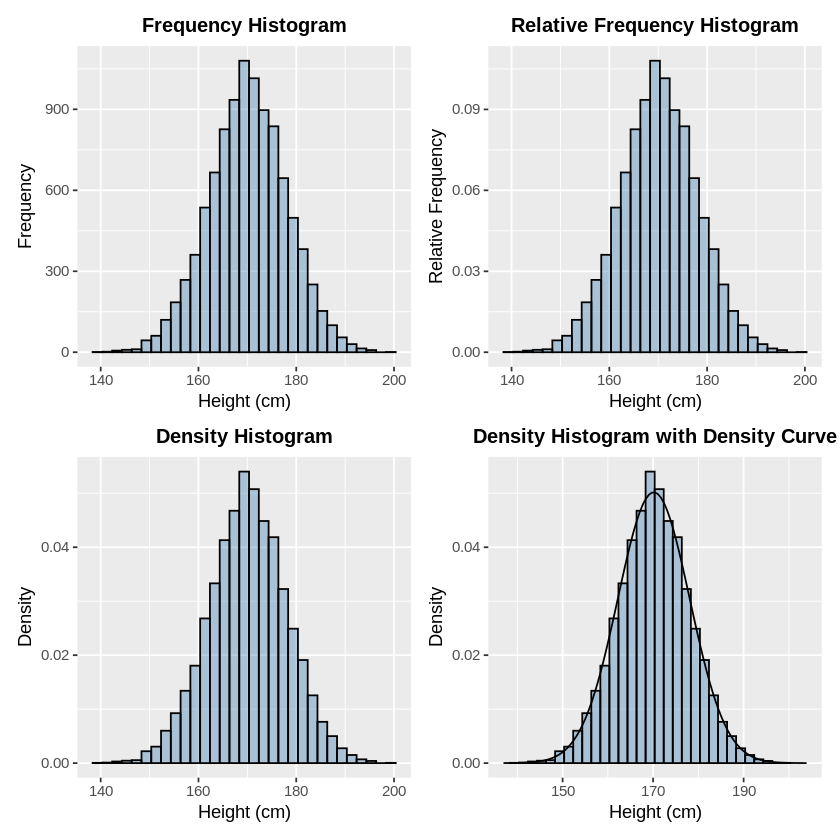

In [4]:
# Load data
dfHeights = read.csv('maleheights.csv', header = TRUE)

sample_mean = mean(dfHeights$Height_cm)
sample_sd = sd(dfHeights$Height_cm)

# Bin width
delta = 2.0

# Plot the frequency histogram for male student heights
p1 = ggplot(data = dfHeights) +
  geom_histogram(aes(x = Height_cm, y = after_stat(count)),
  breaks = seq(sample_mean-4*sample_sd, sample_mean+4*sample_sd, by = delta),
  colour = 'black', fill = 'steelblue', alpha = 0.4) +
  labs(x = 'Height (cm)', y = 'Frequency') + ggtitle('Frequency Histogram') +
  My_Theme

# Plot the relative frequency histogram for male student heights
p2 = ggplot(data = dfHeights) +
  geom_histogram(aes(x = Height_cm, y = after_stat(count)/sum(after_stat(count))),
  breaks = seq(sample_mean-4*sample_sd, sample_mean+4*sample_sd, by = delta),
  colour = 'black', fill = 'steelblue', alpha = 0.4) +
  labs(x = 'Height (cm)', y = 'Relative Frequency') + ggtitle('Relative Frequency Histogram') +
  My_Theme

# Plot the density histogram for male student heights
p3 = ggplot(data = dfHeights) +
  geom_histogram(aes(x = Height_cm, y = after_stat(density)),
  breaks = seq(sample_mean-4*sample_sd, sample_mean+4*sample_sd, by = delta),
  colour = 'black', fill = 'steelblue', alpha = 0.4) +
  labs(x = 'Height (cm)', y = 'Density') + ggtitle('Density Histogram') +
  My_Theme

# Plot the density histogram along with density curve for male student heights
p4 = ggplot(data = dfHeights) +
  geom_histogram(aes(x = Height_cm, y = after_stat(density)),
  breaks = seq(sample_mean-4*sample_sd, sample_mean+4*sample_sd, by = delta),
  colour = 'black', fill = 'steelblue', alpha = 0.4) +
  stat_function(fun = dnorm, args = list(mean = mean(dfHeights$Height_cm), sd = sd(dfHeights$Height_cm))) +
  labs(x = 'Height (cm)', y = 'Density') + ggtitle('Density Histogram with Density Curve') +
  My_Theme


# Plot the histograms side-by-side
p1 + p2 + p3 + p4 + plot_layout(ncol = 2)

---

From the dataset $\color{yellow}{maleheights.csv},$ we can infer that the height of a random male student from the entire population is normally distributed with population mean $\mu = 170\,\text{cm}$ and population standard deviation $\sigma = 8\,\text{cm}.$ That is, $$X\sim N(\mu = 170\,\text{cm},\sigma = 8\,\text{cm})$$ is the random variable that represents the height of a random male student. We say $X$ is normally distributed with (population) parameters mean $\mu= 170\,\text{cm}$ and standard deviation $\sigma = 8\,\text{cm}.$ The probability density function (PDF) of $X$ is given by $$f_X(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2} = \frac{1}{\sqrt{2\pi8^2}}e^{-\frac{1}{2}\left(\frac{x-170}{8}\right)^2}$$ which also corresponds to the graph of the density curve in the previous code cell.

Plot the density curves of male students and that of students who are female basketball players with heights normally distributed with mean $\mu = 190\,\text{cm}$ and standard deviation $\sigma=4\,\text{cm}$ on the same plot/



,x,f_X(x),f_Y(x)
,<dbl>,<dbl>,<dbl>
1,138.0,1.672878e-05,9.998535e-39
2,138.1,1.758511e-05,1.383395e-38
3,138.2,1.848238e-05,1.912868e-38


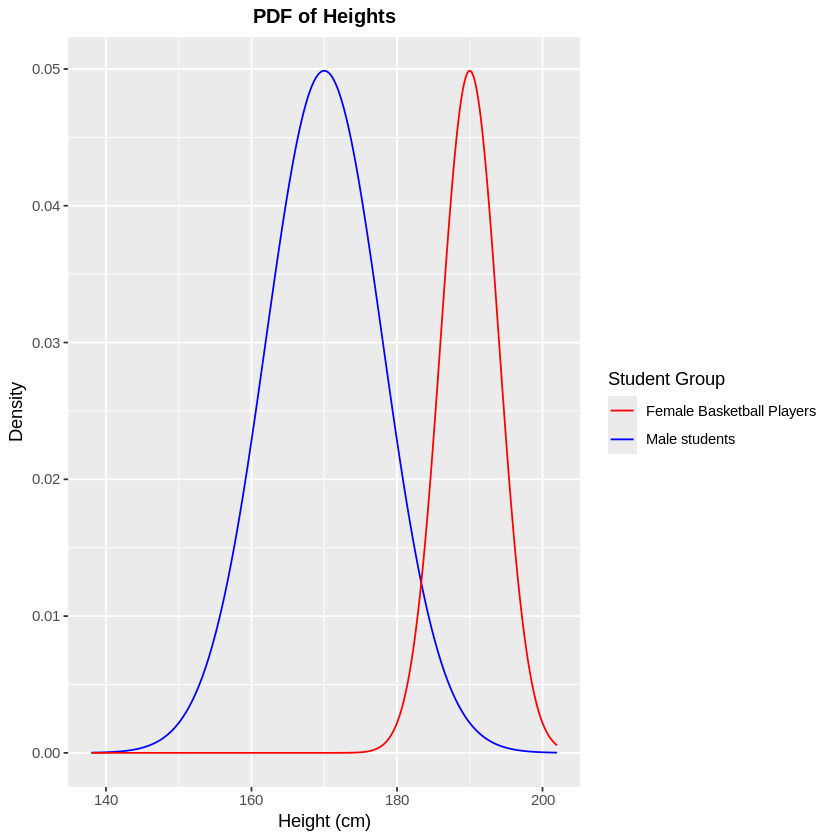

In [5]:
## Plot the density curves of male students and that of students who are female basketball players
x1 = seq(138, 202, 0.1)
x2 = seq(138, 202, 0.1)

# User-defined function for the PDF of heights of male students X~N(mu = 170, sigma = 8)
f_X1 = function(x){
  return((1 / sqrt(2 * pi * (8^2))) * exp(-(x - 170)^2 / (2*(8^2))))
}

# User-defined function for the PDF of heights of female basketball players Y~N(mean = 190, sigma = 4)
f_X2 = function(x){
  return((1 / sqrt(2 * pi * (8^2))) * exp(-(x - 190)^2 / (2*(4^2))))
}
df = as.data.frame(cbind(x1, f_X1(x1), f_X2(x2))) # data.frame(x, f_X(x), f_Y(y))
colnames(df) = c('x', 'f_X(x)', 'f_Y(x)')
head(df, 3)
p = ggplot(data = df) +
  geom_line(aes(x = x1, y = f_X1(x1), color = 'Male students')) +
  geom_line(aes(x = x2, y = f_X2(x2), color = 'Female Basketball Players')) +
  scale_color_manual(name = 'Student Group', values = c('Male students' = 'blue', 'Female Basketball Players'= 'red')) +
  labs(x = 'Height (cm)', y = 'Density') + ggtitle('PDF of Heights') +
  My_Theme

p

---

Run the following cell to see how histogram shape changes with bin width ($8\,\text{cm}, 4\,\text{cm}, 2\,\text{cm},$ and $0.5\,\text{cm}$) for the $\color{yellow}{maleheights.csv}$ data.

---

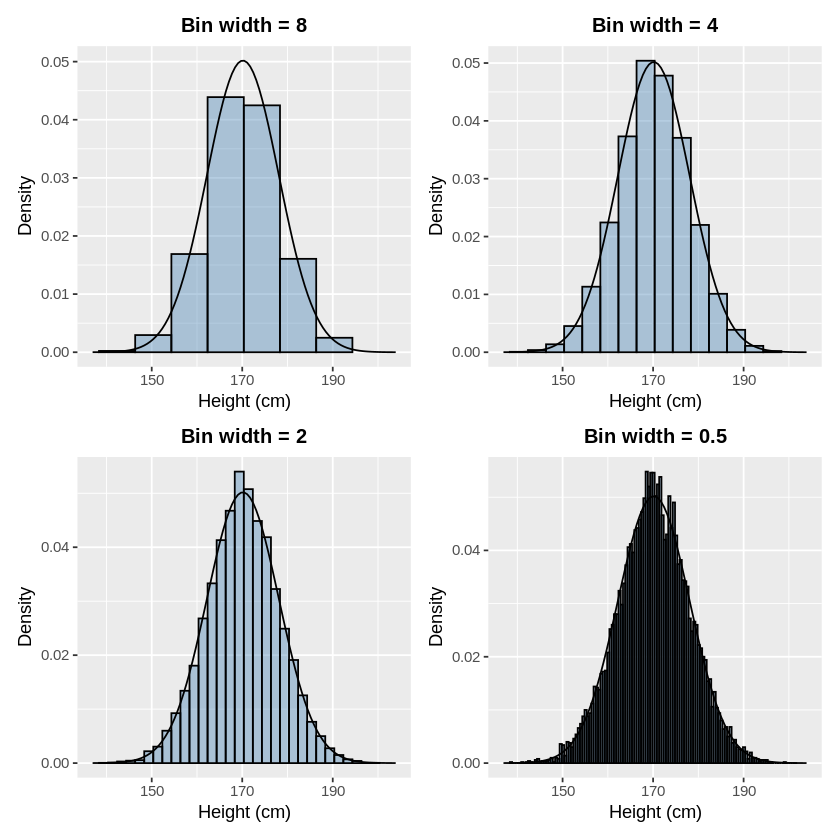

In [6]:
# Bin widths
binwidths = c(8, 4, 2, 0.5)


# Plot the density histogram along with density curve for male student heights
# for bin width 8.0
plot_density_histogram = function(binwidth){
  ggplot(data = dfHeights) +
  geom_histogram(aes(x = Height_cm, y = after_stat(density)),
  breaks = seq(sample_mean-4*sample_sd, sample_mean+4*sample_sd, by = binwidth),
  colour = 'black', fill = 'steelblue', alpha = 0.4) +
  stat_function(fun = dnorm, args = list(mean = sample_mean, sd = sample_sd)) +
  labs(x = 'Height (cm)', y = 'Density') + ggtitle(paste0('Bin width = ', binwidth)) +
  My_Theme
}

# Generate plots for all 4 binwidths in one shot
p = lapply(binwidths, plot_density_histogram)

# Plot the histograms side-by-side
p[[1]] + p[[2]] + p[[3]] + p[[4]] + plot_layout(ncol = 2)

---

Calculate the probability that a random male student's height is:

1. at most $162\,\text{cm}.$
2. in between $150\,\text{cm}$ and $160\,\text{cm}.$
3. more than $170\,\text{cm}.$

---


In [7]:
# Calculate the probability that a random male student's height is: (1) at most
# 162cm, (2) in between 150cm and 160cm, and (3) more than 170cm.
mu = mean(dfHeights$Height_cm)
sigma = sd(dfHeights$Height_cm)
pnorm(162, mu, sigma)
pnorm(160, mu, sigma)-pnorm(150, mu, sigma)
1-pnorm(170, mu, sigma)
pnorm(170, mu, sigma, lower.tail = FALSE)

[1] 0.1528167

[1] 0.09533661

[1] 0.5072259

[1] 0.5072259

---

68-95-99 rule: if $X\sim N(\mu, \sigma),$ then

1. $68\%$ of samples are within one standard deviation of the mean;
2. $95\%$ of samples are within two standard deviations of the mean;
3. $99\%$ of samples are within three standard deviations of the mean.

---

In [8]:
# Probability that height is within 1 standard deviation of the mean
pnorm(mu+sigma, mu, sigma) - pnorm(mu-sigma, mu, sigma)

# Probability that height is within 2 standard deviations of the mean
pnorm(mu+2*sigma, mu, sigma) - pnorm(mu-2*sigma, mu, sigma)

# Probability that height is within 3 standard deviations of the mean
pnorm(mu+3*sigma, mu, sigma) - pnorm(mu-3*sigma, mu, sigma)

[1] 0.6826895

[1] 0.9544997

[1] 0.9973002

![](https://bl3302files.storage.live.com/y4mSacrhvmYQvAQs9HfveCtAfA3fJ0t7jP4GNhaY3UqVuxcYA-326aVrKCeU9xdhW3gwZrlXJJjJ8_IkQoYfnJMb4XrT9gfiExsipeWrIOPtuYYeCy15oYo5TbugNfLMPu9XUM_HBTaC8z139Vrnokl3ENXIIZnl0ZyLONkcDDnz19L0UBss_37QeUHgSFPK4za?width=451&height=163&cropmode=none)

In [9]:
# Amount of rainfall X ~ N(mu = 40 in, sd = 4 in)
# Probability of abundant rainfall = P(X > 50)
mu = 40
sigma = 4
p = 1-pnorm(50, mu, sigma)
r = 1
# Y ~ NegBin(r = 1, p = as calculated above)
j = 10
1-pnbinom(j-r, r, p)

[1] 0.9396101

---

PDF of a uniform random variable $X\sim\text{Unif}(a,b)$ is given by $f_X(x)=\begin{cases}\frac{1}{b-a}&\text{if }a\leq x\leq b\\0&\text{otherwise}.\end{cases}.$

For example, consider $X\sim\text{Unif}(a=0, b= 1).$

Try different values of the parameters $a$ and $b.$ Also, uncommenr the $\texttt{geom_ribbon}$ statement to see its effect.

---

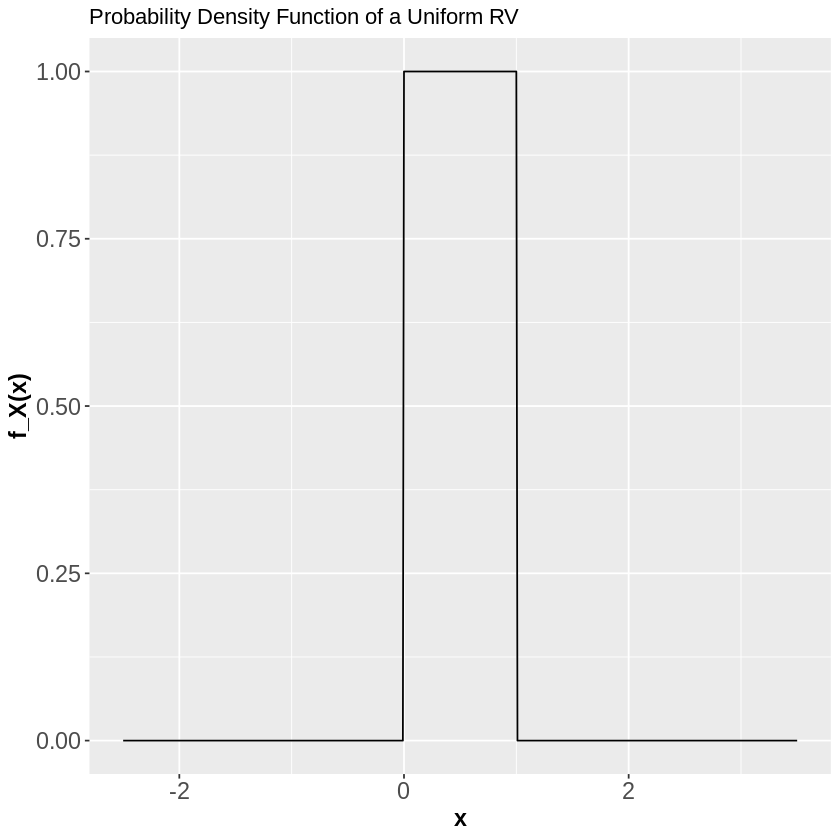

In [10]:
a = 0
b = 1
x = seq(a-2.5, b+2.5, by = .01)
f_X = dunif(x, a, b)
df = data.frame(x, f_X)
p = ggplot(data = df, aes(x = x, y = f_X)) +
    geom_line(aes(x, f_X)) +
    #geom_ribbon(data = df %>% filter(x >= 0.8 & x <= 1.0),  aes(x = x,
    #              ymin = 0, ymax = f_X), fill = "blue") +
    labs(x = 'x', y = 'f_X(x)', title = 'Probability Density Function of a Uniform RV') +
    theme(axis.text = element_text(size = 12),
    axis.text.x = element_text(size = 14),
    axis.text.y = element_text(size = 14),
    axis.title =element_text(size = 14, face = "bold"))
p

---

At a particular bus stop buses arrive and leave at 15 minute intervals (2:00, 2:15, 2:30 etc.)

Passengers arrive at a bus stop uniformly between 2:00 and 2:30 PM. Define a random variable $X$ that captures the arrival time in minutes of a random passenger starting from 2 PM.

$$X\sim\text{Unif}(a=0, b=30).$$

1. What is the probability that a passenger has to wait less than 5 minutes for a bus?
$P((10 < X < 15)\ \text{OR}\ (25 < X < 30)) = P(10 < X <15) + P(25 < X < 30).$
2. What is the probability that a passenger has to wait more than 14 minutes for a bus? $P((0<X<1)\ \text{OR}\ (15 < X < 16)) = P(0<X<1) + P(15<X<16).$

---

In [11]:
a = 0
b = 30
punif(10, a, b) # P(X <= 10) cumulative distribution function (CDF)
punif(15, a, b)- punif(10, a, b) # P(10 <= X <= 15)
punif(30, a, b)- punif(25, a, b) # P(25 <= X <= 30)
# Answer to the first question
punif(15, a, b)- punif(10, a, b)+punif(30, a, b)- punif(25, a, b)
# Answer to the second question
punif(1, a, b) - punif(0, a, b) + punif(16, a, b) - punif(15, a, b)

[1] 0.3333333

[1] 0.1666667

[1] 0.1666667

[1] 0.3333333

[1] 0.06666667

---

Simulate a uniform random variable $X\sim\text{Unif}(a=0, b=1)$ using the $\texttt{runif()}$ function and plot its:

1. **Frequency histogram**;
2. **Relative frequency histogram**;
3. **Density histogram**.

---


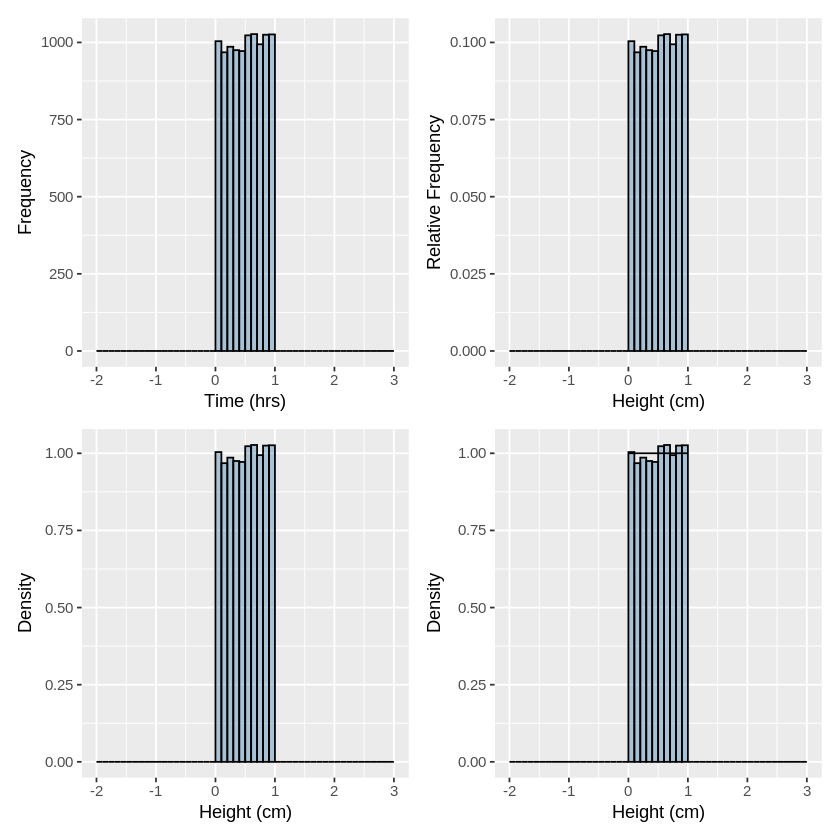

In [12]:
# Parameters
a = 0
b = 1

# Bin width
delta = 0.1

# Simulate data
nsimulations = 1e4
simulatedData = runif(nsimulations, a, b)
df = as.data.frame(simulatedData)
colnames(df) = c('SimulatedValues')

# Plot the frequency histogram
p1 = ggplot(data = df) +
  geom_histogram(aes(x = SimulatedValues, y = after_stat(count)),
  breaks = seq(a-2, b+2, by = delta),
  colour = 'black', fill = 'steelblue', alpha = 0.4) +
  My_Theme+
  labs(x = 'Time (hrs)', y = 'Frequency')

# Plot the relative frequency histogram
p2 = ggplot(data = df) +
  geom_histogram(aes(x = SimulatedValues, y = after_stat(count)/sum(after_stat(count))),
  breaks = seq(a-2, b+2, by = delta),
  colour = 'black', fill = 'steelblue', alpha = 0.4) +
  My_Theme+
  labs(x = 'Height (cm)', y = 'Relative Frequency')

# Plot the density histogram
p3 = ggplot(data = df) +
  geom_histogram(aes(x = SimulatedValues, y = after_stat(density)),
  breaks = seq(a-2, b+2, by = delta),
  colour = 'black', fill = 'steelblue', alpha = 0.4) +
  My_Theme+
  labs(x = 'Height (cm)', y = 'Density')

# Plot the density histogram along with density curve
p4 = ggplot(data = df) +
  geom_histogram(aes(x = SimulatedValues, y = after_stat(density)),
  breaks = seq(a-2, b+2, by = delta),
  colour = 'black', fill = 'steelblue', alpha = 0.4) +
  stat_function(fun = dunif, args = list(min = min(df$SimulatedValues), max = max(df$SimulatedValues))) +
  My_Theme+
  labs(x = 'Height (cm)', y = 'Density')


# Plot the histograms side-by-side
p1 + p2 + p3 + p4 + plot_layout(ncol = 2)

---

Time until first success is modeled by an exponential random variable with a parameter $\lambda$ that has the same meaning as the average number of successes in the case of a Poisson random variable.

Consider the following random variable $T$ that models the time until failure of a laptop: $$T\sim\text{Exp}\left(\lambda = \frac{1}{5000}\,\frac{\text{failures}}{\text{hour}}\right).$$

$T$ is the time until the next failure of a random laptop given that on an average there are 1/5000 failures per hour.

The PDF of an exponential random variable $T\sim\text{Exp}(\lambda)$ is given by $$f_T(t)=\begin{cases}\lambda e^{-\lambda t}&\text{if }t\geq 0\\0&\text{otherwise}.\end{cases}.$$

For the time-until-laptop-failure random variable, simulate and plot the:

1. **Frequency histogram**, where each bin has a height equal to the number of laptops whose failure times (in hours) fall in that bin);
2. **Relative frequency histogram**, where each bin has a height equal to the proportion of laptops whose failure times (in hours) fall in that bin);
3. **Density histogram**, where each bin has a height equal to the proportion of laptops whose failure times (in hours) in that bin divided by the bin width).

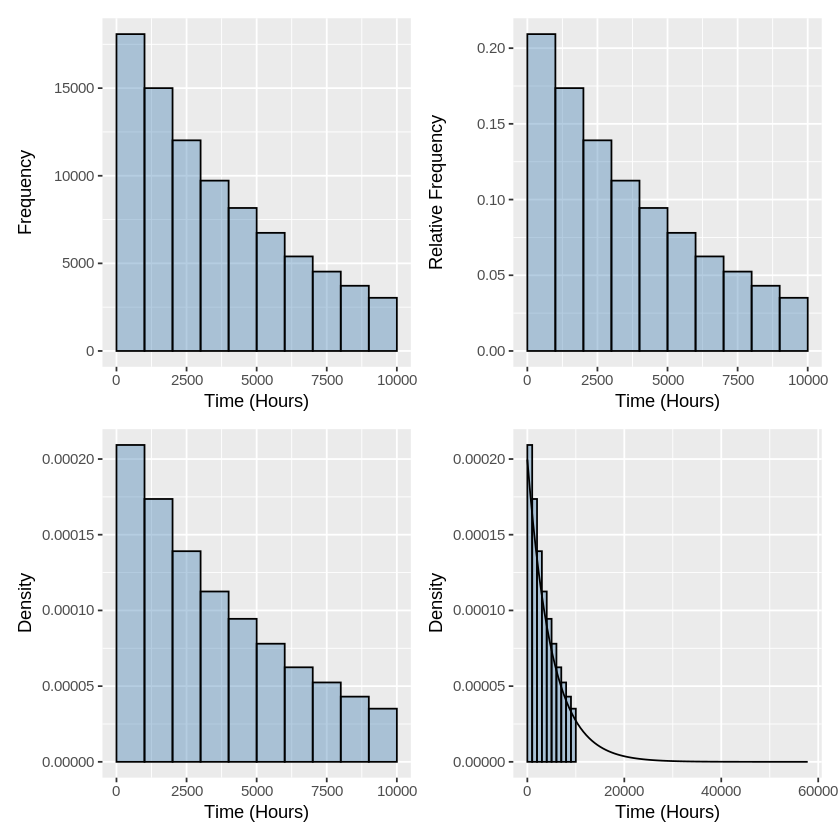

In [13]:
# Parameters
lambda = 1/5000

# Bin width
delta = 1000

nsimulations = 1e5
simulatedData = rexp(nsimulations, rate = 1/5000)

df = as.data.frame(simulatedData)
colnames(df) = c('FailureTime')

# Plot the frequency histogram for failure times
p1 = ggplot(data = df) +
  geom_histogram(aes(x = FailureTime, y = after_stat(count)),
  breaks = seq(0, 10000, by = delta),
  colour = 'black', fill = 'steelblue', alpha = 0.4) +
  My_Theme+
  labs(x = 'Time (Hours)', y = 'Frequency')

# Plot the relative frequency histogram for failure time
p2 = ggplot(data = df) +
  geom_histogram(aes(x = FailureTime, y = after_stat(count)/sum(after_stat(count))),
  breaks =seq(0, 10000, by = delta),
  colour = 'black', fill = 'steelblue', alpha = 0.4) +
  My_Theme+
  labs(x = 'Time (Hours)', y = 'Relative Frequency')

# Plot the density histogram for failure time
p3 = ggplot(data = df) +
  geom_histogram(aes(x = FailureTime, y = after_stat(density)),
  breaks = seq(0, 10000, by = delta),
  colour = 'black', fill = 'steelblue', alpha = 0.4) +
  My_Theme+
  labs(x = 'Time (Hours)', y = 'Density')

# Plot the density histogram along with density curve for failure time
p4 = ggplot(data = df) +
  geom_histogram(aes(x = FailureTime, y = after_stat(density)),
  breaks = seq(0, 10000, by = delta),
  colour = 'black', fill = 'steelblue', alpha = 0.4) +
  stat_function(fun = dexp, args = list(rate = 1 / mean(df$FailureTime))) +
  My_Theme+
  labs(x = 'Time (Hours)', y = 'Density')

# Plot the histograms side-by-side
p1 + p2 + p3 + p4 + plot_layout(ncol = 2)

---

Run the following cell to compare the PDF of exponential random variables with different rate parameters $\lambda$:

$$T_1\sim\text{Exp}(\lambda = 2)\, \text{and } T_2\sim\text{Exp}(\lambda = 1/2).$$

Uncomment the ribbon statement and see what is being visualized.

---

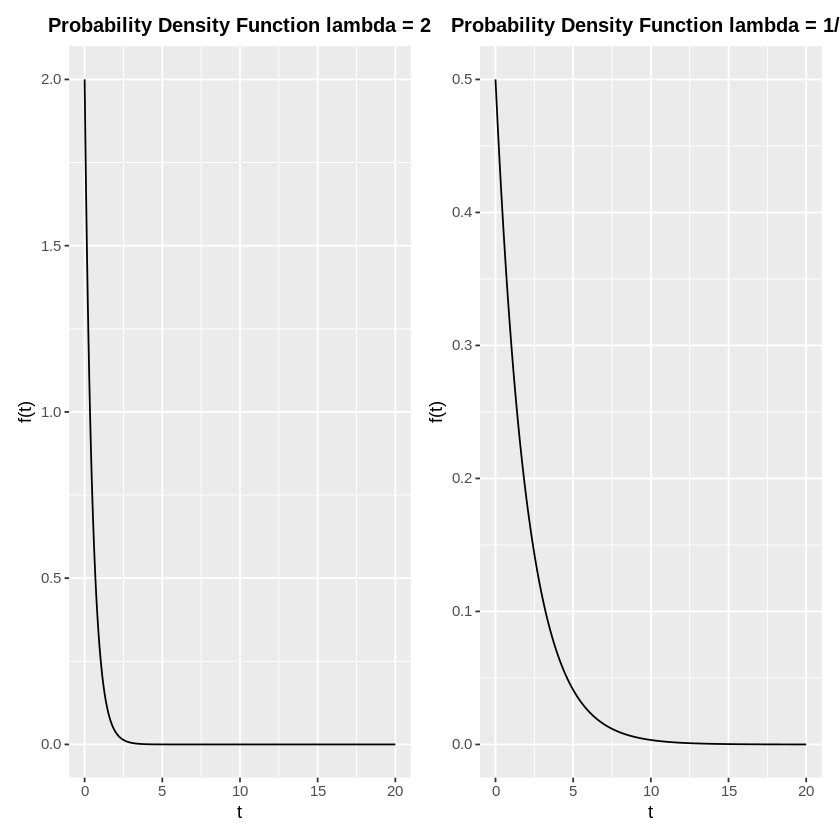

In [14]:
t = seq(0, 20, by = .05)
f_T1 = dexp(t, rate = 2)
df1 = data.frame(t, f_T1)
f_T2 = dexp(t, rate = 1/2)
df2 = data.frame(t, f_T2)
p1 = ggplot(data = df1) +
    geom_line(aes(x = t, y = f_T1)) +
    #geom_ribbon(data = df1 %>% filter(t >= 1 & t <= 2),  aes(x = t,
    #              ymin = 0, ymax = f_T1), fill = "blue") +
    labs(x = 't', y = 'f(t)', title = 'Probability Density Function lambda = 2') +
    My_Theme

p2 = ggplot(data = df2) +
    geom_line(aes(x = t, y = f_T2)) +
    #geom_ribbon(data = df2 %>% filter(t >= 1 & t <= 2),  aes(x = t,
    #              ymin = 0, ymax = f_T2), fill = "blue") +
    labs(x = 't', y = 'f(t)', title = 'Probability Density Function lambda = 1/2') +
    My_Theme

p1 + p2 + plot_layout(ncol = 2)

---

On an average, a laptop fails once every 5000 hours. Suppose you used your laptop for 5 hours every day. WHat is the probability that your laptop will last for more than 4 years?

 $$T\sim\text{Exp}\left(\lambda = 1\,\frac{\text{failure}}{\text{5000 hours}}\right)\Rightarrow T\sim\text{Exp}\left(\lambda = \frac{1}{5000}\,\frac{\text{failures}}{\text{hour}}\right)\Rightarrow T\sim\text{Exp}\left(\lambda = \frac{365\times24}{5000}\,\frac{\text{failures}}{\color{yellow}{year}}\right).$$

 We need $P\left(T > \frac{5\,\text{hours}}{24\,\text{hours}}\times 4\,{\color{yellow}{years}}\right)$ as the laptop is used only 5 hours every day.

 Note how the final units match as shown in $\color{yellow}{yellow}.$

---

In [15]:
lambda = 365*24/5000
1-pexp((5/24)*4, lambda)

[1] 0.2322363

![](https://bl3302files.storage.live.com/y4mqcunFWufbZoqiEdv6VwMJzoCf_Tr9ITfxRfrY9zHp84-QQrqHbxtKHBiUcvgQmWq0sF1xkauf72M_h_ndzOWXjd_qYeqovJY_jOvAeHy9fF7lu0fdUmBVVk4-lo_RpTjRy8V2S4ECquJl-yMa1mFYRAAIvGXx0NEl_ABUZHaQ_M2g3PydLWB9uA7pplK9aKn?width=660&height=302&cropmode=none)

In [16]:
mu = 20
sigma = 4
pA = 1 - pnorm(18, mu, sigma)
lambda = 1/20
pB = 1 - pexp(18, lambda)
pA
pB
# Probability that the screen is manufactured by A given that T > 18
(pA * 0.5) / (pA * 0.5 + pB * 0.5)
# Probability that the screen is manufactured by B given that T > 18
(pB * 0.5) / (pB * 0.5 + pA * 0.5)

[1] 0.6914625

[1] 0.4065697

[1] 0.6297288

[1] 0.3702712

![](https://bl3302files.storage.live.com/y4mglacF4S9CUNNCOSu753zK6KisVN3fL8NHVXRNxAFa-OxsgVHACzz8lG8KQuXXY-NPrTcLUm7Sixhoqc9dyApmhdspw3EZiXC5AlSmBE2_CfOXhSzoHtYI19eX_Lvo3zck5LHSwZVbWE9pOOTV3ZOzMxbicbKZuTV0IGrxF-xjpPf5e0ZV8kR9BaL5wHQR162?width=660&height=309&cropmode=none)

In [17]:
# T ~ Exp(lambda = 1/10 calls per minute) and we need P(T > 20)
lambda = 1/10
1-pexp(20, lambda)
pexp(20, lambda, lower.tail = FALSE)

[1] 0.1353353

[1] 0.1353353